# Tensorflow introduction
---

TensorFlow is a Python-based, free, open source machine learning platform, developed primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to enable engineers and researchers to manipulate mathematical expressions over numerical tensors. 

![TensorFlow](https://www.researchgate.net/profile/Shanthi-K-G/publication/343625927/figure/fig3/AS:923892524806145@1597284551076/Basic-Tensor-Flow-Block-Diagram-315-Keras-LibraryIt-is-an-open-source-neural-network.jpg)

TensorFlow goes far beyond the scope of NumPy in the following ways:

- It can automatically compute the gradient of any differentiable expression, making it highly suitable for machine learning.
- It can run not only on CPUs, but also on GPUs and TPUs, highly parallel hard-
ware accelerators.
- Computation defined in TensorFlow can be easily distributed across many
machines.
- TensorFlow programs can be exported to other runtimes, such as C++, Java-
Script (for browser-based applications), or TensorFlow Lite (for applications
running on mobile devices or embedded devices), etc. This makes TensorFlow
applications easy to deploy in practical settings.

TensorFlow scales fairly well: for instance, scientists from Oak Ridge National Lab have used it to train a 1.1 exaFLOPS extreme weather forecasting model on the 27,000 GPUs of the IBM Summit supercomputer. Likewise, Google has used TensorFlow to develop very compute-intensive deep learning applications, such as the chess playing and Go-playing agent AlphaZero.

# Keras Introduction
---

Keras is a deep learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep learning model. Keras was initially developed for research, with the aim of enabling fast deep learning experimentation.

Through TensorFlow, Keras can run on top of different types of hardware: GPU, TPU, or plain CPU. It can also be seamlessly scaled to thousands of
machines.

![Keras and TensorFlow](https://929687.smushcdn.com/2633864/wp-content/uploads/2019/10/keras_vs_tfdotkeras_relationship.png)

Keras is known for prioritizing the developer experience. It’s an API for human
beings, not machines. It follows best practices for reducing cognitive load: it offers consistent and simple workflows, it minimizes the number of actions required for common use cases, and it provides clear and actionable feedback upon user error. This makes Keras easy to learn for a beginner, and highly productive to use for an expert.

Keras has well over a million users as of late 2021, ranging from academic researchers, engineers, and data scientists at both startups and large companies to graduate students and hobbyists. Keras is used at Google, Netflix, Uber, CERN, NASA, Yelp, Instacart, Square, and hundreds of startups working on a wide range of problems across every industry.

The Waymo self-driving cars are developed with Keras models. Keras is also a popular framework on Kaggle, the machine learning competition website, where most deep learning competitions have been won using Keras.

[![Waymo](https://img.youtube.com/vi/O8TSA-X9UlU/0.jpg)](https://www.youtube.com/watch?v=O8TSA-X9UlU)

Keras allows:

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

## First example of a Neural Network in Keras

Let’s look at a concrete example of a neural network that uses the Python library Keras to learn to classify the XOR truth table.

The workflow will be as follows: First, we’ll feed the neural network the training data and training labels. The network will then learn to associate data and labels. Finally, we’ll ask the network to produce predictions for test data, and we’ll verify whether these predictions match the labels from test labels.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers

import numpy as np
import matplotlib.pyplot as plt

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


### Definition of input data and labels


In [2]:
XOR = np.array([[0,0], [0,1], [1,0], [1,1]])
print(f"XOR data: \n{XOR}\nShape: {XOR.shape}")

XOR_labels = np.array([[0], [1], [1], [0]])
print(f"XOR labels: \n{XOR_labels}\nShape: {XOR_labels.shape})")


XOR data: 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Shape: (4, 2)
XOR labels: 
[[0]
 [1]
 [1]
 [0]]
Shape: (4, 1))


### Model definition

The core building block of neural networks is the *layer*. Specifically, layers extract representations out of the data fed into them — hopefully, representations that are more meaningful for the problem at hand.

A layer is a data processing module that takes as input one or more tensors and that outputs one or more tensors. Some layers are stateless, but more frequently layers have a state: the layer’s weights, one or several tensors learned with stochastic gradient descent, which together contain the network’s knowledge.

Different types of layers are appropriate for different tensor formats and different types of data processing. For instance, simple vector data, stored in rank-2 tensors of shape (samples, features), is often processed by densely connected layers, also called fully connected or dense layers (the Dense class in Keras). Sequence data, stored in rank-3 tensors of shape (samples, timesteps, features), is typically processed by recurrent layers, such as an LSTM layer, or 1D convolution layers (Conv1D). Image data, stored in rank-4 tensors, is usually processed by 2D convolution layers (Conv2D).

To make the model ready for training, we need to pick three more things as part of the compilation step:

- An optimizer: The mechanism through which the model will update itself based
on the training data it sees, so as to improve its performance. Determines how the network will be updated based on the loss function. Some common optimizers are:
  - Stochastic Gradient Descent (SGD)
  - RMSprop
  - Adam
  - Adagrad
- A loss function: How the model will be able to measure its performance on the
training data, and thus how it will be able to steer itself in the right direction. The quantity that will be minimized during training. It represents a measure of success for the task at hand. Some common loss functions are:
  - CategoricalCrossentropy
  - SparseCategoricalCrossentropy
  - BinaryCrossentropy
  - MeanSquaredError
- Metrics: The measures of success you want to monitor during training and vali-
dation, such as classification accuracy. Unlike the loss, training will not optimize directly for these metrics. As such, metrics don’t need to be differentiable.

Once you’ve picked your loss, optimizer, and metrics, you can use the built-in compile() and fit() methods to start training your model. 

In [3]:
# The keras.models.Sequential class is a wrapper for the neural network model that treats the network as a sequence of layers
model = models.Sequential()

# Dense layers: fully connected layers

# Input layer
model.add(layers.InputLayer(2, name = "Input_layer"))

# Hidden layer
model.add(layers.Dense(2, activation='sigmoid', name='Hidden_layer_1'))

# Alternatively, instead of defining an input layer and a hidden, you can define a hidden layer with the expected input shape 
# model.add(layers.Dense(2, input_shape=(2,), activation='sigmoid', name='hidden_1'))

# output layer
model.add(layers.Dense(1, activation='sigmoid', name='Output_layer'))

# SDG, learning rate, loss
# Once we have our model built, we need to compile it before it can be run. Compiling the Keras model calls the backend (tensorflow, theano, etc.) and binds the optimizer, 
# loss function, and other parameters required before the model can be run on any input data.
# Metrics to monitor during training and testing. Here we will only care about accuracy.
model.compile(optimizer=optimizers.SGD(learning_rate=0.5), loss='binary_crossentropy', metrics="accuracy")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 2)                 6         
                                                                 
 Output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Another way to define a model, is to create a Sequential model, and pass a list of layers as an argument.

In [4]:
model = models.Sequential([
  layers.InputLayer(2),
  layers.Dense(2, activation="sigmoid", name="Hidden_layer_1"),
  layers.Dense(1, activation="sigmoid", name="Output_layer")
])

model.compile(optimizer=optimizers.SGD(learning_rate=0.5), loss='binary_crossentropy', metrics="accuracy")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 2)                 6         
                                                                 
 Output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### Train the model

The model is trained with the fit() method, through the following command that specifies the number of training epochs.

In [5]:
history = model.fit(XOR, XOR_labels, epochs=2000, verbose=True)

Epoch 1/2000
1/1 [==============================] - 1s 750ms/step - loss: 0.7994 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.7608 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7359 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7201 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.7000 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6976 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 11/200

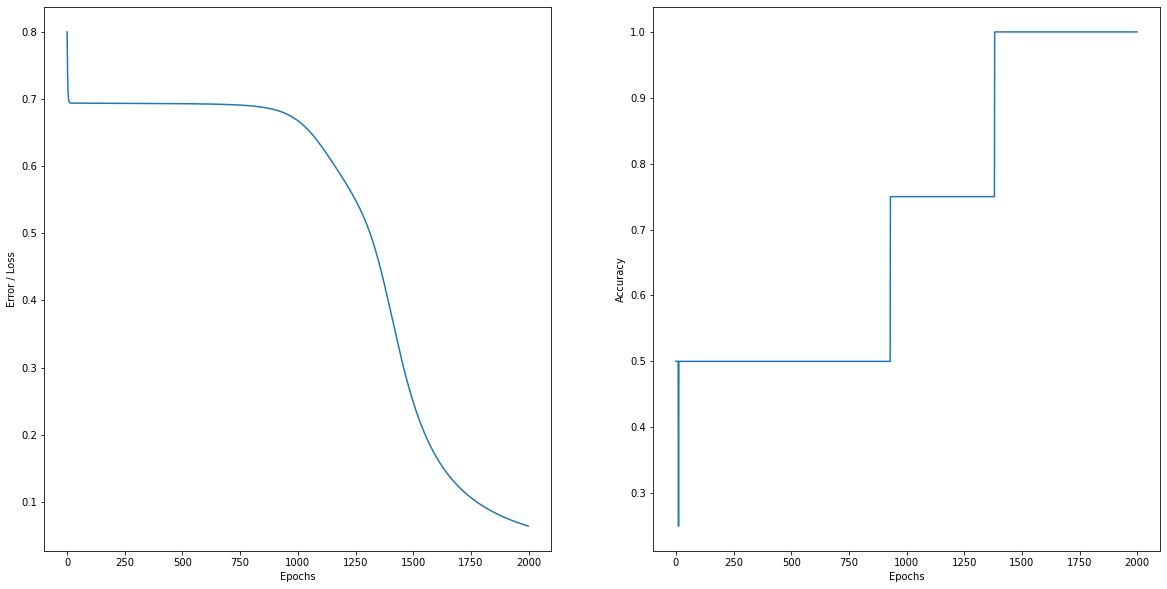

In [6]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']

fig, (loss_ax, acc_ax) = plt.subplots(1,2, figsize=(20,10))
loss_ax.set_xlabel('Epochs')
loss_ax.set_ylabel('Error / Loss')
loss_ax.plot(loss_values)

acc_ax.set_xlabel('Epochs')
acc_ax.set_ylabel('Accuracy')
acc_ax.plot(accuracy_values)

## Make a prediction on some data

We can make prediction by passing some input data through the model. Note the shape of the input data, and the prediction.

In [15]:
input = XOR

prediction = model.predict(input)
print("Input Data:\n", input)
print("Prediction:\n", prediction)

input = np.array([[0.1, 0.5]])
print("Input Data:\n", input, input.shape)

prediction = model.predict(input)
print("Prediction:\n",prediction, prediction.shape)

Input Data:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Prediction:
 [[0.01036608]
 [0.9543774 ]
 [0.02732936]
 [0.97283006]]
Input Data:
 [[0.1 0.5]] (1, 2)
Prediction:
 [[0.1792275]] (1, 1)


### Classifying more elaborate data sets

Features:
[[0.51986    0.34094045]
 [0.54085678 0.54630819]
 [0.41821456 0.32908876]
 [0.67040857 0.45290218]
 [0.38548727 0.42510337]]
Labels:
[0 0 0 0 0]
(1400, 2)


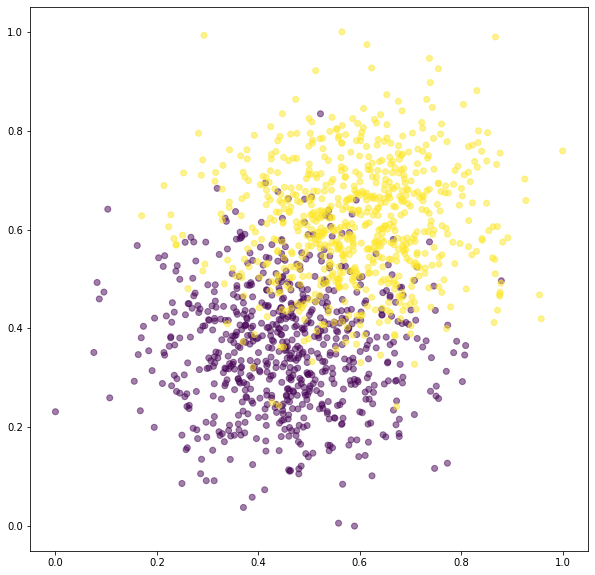

In [28]:
# Set a seed to get same random numbers
np.random.seed(42)

# this creates 2 classes clearly separated
class_1 = np.random.randn(700, 2) + np.array([0, -1])  
class_2 = np.random.randn(700, 2) + np.array([1, 1])  

# joins the classes into one np array
feature_set = np.vstack([class_1, class_2])

# Normalize the data
min = np.min(feature_set, axis=0)
max = np.max(feature_set, axis=0)
feature_set_standard  = (feature_set - min) / (max-min)

# creates one hot labels for the multiclass classification
classes_labels = np.array([0]*700 + [1]*700)

print(f"Features:\n{feature_set_standard[:5]}\nLabels:\n{classes_labels[:5]}")

print(feature_set.shape)

plt.figure(figsize=(10,10))  
# plt.scatter(feature_set[:,0], feature_set[:,1], c=classes_labels, alpha=0.5)  
plt.scatter(feature_set_standard[:,0], feature_set_standard[:,1], c=classes_labels, alpha=0.5)  
plt.show()

In [39]:
model = models.Sequential()

model.add(layers.InputLayer(2, name = "Input_layer"))
model.add(layers.Dense(1, activation='sigmoid', name='Hidden_layer_1'))
model.add(layers.Dense(1, activation='sigmoid', name='Output_layer'))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='binary_crossentropy', metrics="accuracy")

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 1)                 3         
                                                                 
 Output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(feature_set_standard, classes_labels, epochs=500, verbose=False)

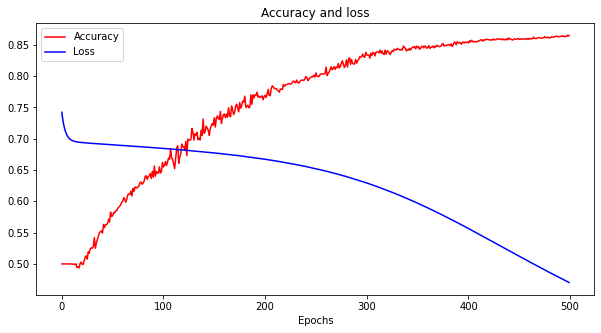

In [41]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']

plt.figure(figsize=(10,5))  
plt.plot(accuracy_values, 'r', label='Accuracy')
plt.plot(loss_values, 'b', label='Loss')
plt.title('Accuracy and loss')
plt.xlabel('Epochs')
plt.legend()

In [35]:
new_data = np.array([[0., 0.], [0.8, 1.0], [0.6, 0.7], [0.1, 0.1], [0.40672844, 0.2281337]])

prediction = model.predict(new_data)

print(f"Prediction:\n{np.column_stack((new_data, prediction))}")

Prediction:
[[0.         0.         0.32519621]
 [0.8        1.         0.71158057]
 [0.6        0.7        0.60497379]
 [0.1        0.1        0.36351353]
 [0.40672844 0.2281337  0.42944527]]
